In [1]:
import porespy as ps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("2to1_VL70_1.csv", header=None, names=['X', 'Y', 'Z', 'R'])
print(df)

           X       Y       Z    R
0     3.7603  5.2473  9.6101  0.4
1     1.1820  6.0812  9.8102  0.2
2     4.1183  4.7836  9.8101  0.2
3     4.9875  1.1300  9.8100  0.2
4     3.1846  3.9027  9.8100  0.2
...      ...     ...     ...  ...
6804  6.1136  8.4160  0.9980  0.4
6805  0.8560  4.4977  0.4740  0.2
6806  5.9936  7.0078  0.6280  0.2
6807  3.5628  0.2160  0.3020  0.2
6808  1.7820  9.4000  0.6500  0.2

[6809 rows x 4 columns]


In [7]:
df['X'] *= 50
df['Y'] *= 50
df['Z'] *= 50
df['R'] *= 50

In [8]:
(df['X'].max()*df['Y'].max()*df['Z'].max())**0.333

493.72033681872347

In [9]:
im = ps.generators.spheres_from_coords(df)

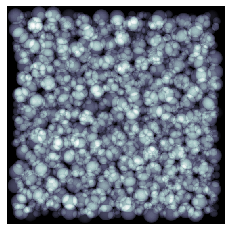

In [10]:
fig, ax = plt.subplots()
ax.imshow(ps.visualization.xray(~im[..., :100], axis=2), interpolation='none', origin='lower', cmap=plt.cm.bone)
ax.axis(False);

# Generate random sphere packs

# Generate random sphere packs - Better approach

Ideas:
- start with larger spheres and then reduce radius of generated spheres when it keeps overlapping more times than a threshold

In [2]:
def is_overlapping(sphere1, sphere2, min_throat=0.05):
    allowed_dist = sphere1[3]+sphere2[3]+min_throat
    distance = np.sqrt((sphere1[0]-sphere2[0])**2 + (sphere1[1]-sphere2[1])**2 + (sphere1[2]-sphere2[2])**2)
    if distance<allowed_dist:
        return True
    else: 
        return False

In [19]:
def calc_porosity(data, volume):
    data = np.array(data)
    return 1-np.sum(4/3*np.pi*(data[:,3]**3))/volume

In [20]:
dx, dy, dz = 20,20,20
rmin, rmax = 2, 10

In [24]:
counter = 0
all_poro = []
data = []
x = np.round(np.random.uniform(0,dx), decimals=5)
y = np.round(np.random.uniform(0,dy), decimals=5)
z = np.round(np.random.uniform(0,dz), decimals=5)
r = np.random.randint(rmin, rmax)/10
data.append([x,y,z,r])
# while counter<500-1:
while calc_porosity(data, dx*dy*dz)>=0.7:
    x = np.round(np.random.uniform(0,dx), decimals=5)
    y = np.round(np.random.uniform(0,dy), decimals=5)
    z = np.round(np.random.uniform(0,dz), decimals=5)
    r = np.random.randint(rmin, rmax)/10
    # print(data.shape)
    temp = np.tile([x,y,z,r], len(data)).reshape([len(data), 4])
    # print(temp)
    maps = list(map(is_overlapping, data, temp)) # inputs ([100,4] , [100,4])
    # maps.pop(counter)
    # print(maps)
    if all(not x for x in maps):
        data.append([x,y,z,r])
        counter+=1
    if counter%200==0:
        print(f"Porosity now = {calc_porosity(data, dx*dy*dz)}")
        all_poro.append(calc_porosity(data, dx*dy*dz))
    if counter==2000:
        break
data = np.array(data)
data.shape

Porosity now = 0.9765878043478977
Porosity now = 0.9548108076719888
Porosity now = 0.9335427490059616
Porosity now = 0.915051334646932
Porosity now = 0.915051334646932
Porosity now = 0.915051334646932
Porosity now = 0.9021990791010962
Porosity now = 0.9021990791010962
Porosity now = 0.9021990791010962
Porosity now = 0.9021990791010962
Porosity now = 0.9021990791010962
Porosity now = 0.9021990791010962
Porosity now = 0.9021990791010962
Porosity now = 0.9021990791010962
Porosity now = 0.9021990791010962
Porosity now = 0.9021990791010962
Porosity now = 0.9021990791010962
Porosity now = 0.8892515285781014
Porosity now = 0.8763196860183746
Porosity now = 0.8763196860183746
Porosity now = 0.8763196860183746
Porosity now = 0.8649654465695256
Porosity now = 0.8552851524062641
Porosity now = 0.8552851524062641
Porosity now = 0.8552851524062641
Porosity now = 0.8552851524062641
Porosity now = 0.8471856029465341


(2001, 4)

In [26]:
calc_porosity(data, dx*dy*dz)

0.8471856029465341

In [27]:
df = pd.DataFrame(np.copy(data), columns=['X', 'Y', 'Z', 'R'])
# print(df)

df['X'] *= 40
df['Y'] *= 40
df['Z'] *= 40
df['R'] *= 40
(df['X'].max()*df['Y'].max()*df['Z'].max())**0.333

794.2708868812133

In [28]:
im = ps.generators.spheres_from_coords(df)

In [29]:
1-np.count_nonzero(im)/im.size

0.8779644799795082

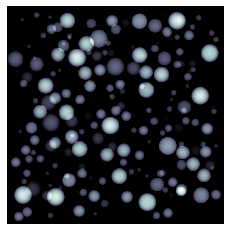

In [30]:
fig, ax = plt.subplots()
ax.imshow(ps.visualization.xray(~im[..., :100], axis=2), interpolation='none', origin='lower', cmap=plt.cm.bone)
ax.axis(False);

In [ ]:
im.shape

In [142]:
np.save('sphere_pack',im)

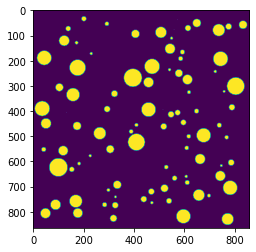

In [31]:
plt.imshow(im[len(im)//2])

# Generate random sphere packs - Better Better Approach

In [32]:
def is_overlapping(sphere1, sphere2, min_throat=0.05):
    allowed_dist = sphere1[3]+sphere2[3]+min_throat
    distance = np.sqrt((sphere1[0]-sphere2[0])**2 + (sphere1[1]-sphere2[1])**2 + (sphere1[2]-sphere2[2])**2)
    if distance<allowed_dist:
        return True
    else: 
        return False

In [33]:
def calc_porosity(data, volume):
    data = np.array(data)
    return 1-np.sum(4/3*np.pi*(data[:,3]**3))/volume

In [74]:
dx, dy, dz = 10,10,10
rmin, rmax = 2, 10

In [88]:
counter = 0
loop_counter = 0
data = []
r = np.random.randint(rmin, rmax)/10
x = np.round(np.random.uniform(0+r,dx-r), decimals=5)
y = np.round(np.random.uniform(0+r,dy-r), decimals=5)
z = np.round(np.random.uniform(0+r,dz-r), decimals=5)
data.append([x,y,z,r])
# while counter<500-1:
while calc_porosity(data, dx*dy*dz)>=0.55:
    loop_counter += 1
    if loop_counter%500==0:
        print(f"Loop #{loop_counter:0>5}, n_spheres={counter:0>5}, poro={calc_porosity(data, dx*dy*dz):.3f}")
    x = np.round(np.random.uniform(0+rmax,dx-rmax), decimals=5)
    y = np.round(np.random.uniform(0+rmax,dy-rmax), decimals=5)
    z = np.round(np.random.uniform(0+rmax,dz-rmax), decimals=5)
    r_range = np.arange(rmin, rmax+1)/np.mean([dx,dy,dz])
    for r in list(reversed(r_range)):
        # r = np.random.randint(rmin, rmax)/10
        # print(data.shape)
        temp = np.tile([x,y,z,r], len(data)).reshape([len(data), 4])
        # print(temp)
        maps = list(map(is_overlapping, data, temp)) # inputs ([100,4] , [100,4])
        # maps.pop(counter)
        # print(maps)
        if all(not x for x in maps):
            data.append([x,y,z,r])
            counter+=1
            break
data = np.array(data)
data.shape

Loop #00500, n_spheres=00271, poro=0.656
Loop #01000, n_spheres=00430, poro=0.615
Loop #01500, n_spheres=00565, poro=0.584
Loop #02000, n_spheres=00670, poro=0.571
Loop #02500, n_spheres=00764, poro=0.561
Loop #03000, n_spheres=00845, poro=0.554
Loop #03500, n_spheres=00905, poro=0.550


(911, 4)

In [89]:
calc_porosity(data, dx*dy*dz)

0.5498139615307874

In [97]:
df = pd.DataFrame(np.copy(data), columns=['X', 'Y', 'Z', 'R'])
print(df)
scale_factor = 50
df['X'] *= scale_factor
df['Y'] *= scale_factor
df['Z'] *= scale_factor
df['R'] *= scale_factor
(df['X'].max()*df['Y'].max()*df['Z'].max())**0.333

           X        Y        Z    R
0    8.16956  1.96501  9.39181  0.4
1    8.17760  0.70498  1.26069  1.0
2    6.86927  9.17454  0.49090  1.0
3    1.92717  4.14823  0.33484  1.0
4    7.26949  0.25773  4.49905  1.0
..       ...      ...      ...  ...
906  6.29445  0.79703  9.00403  0.2
907  4.97058  5.73998  8.08127  0.2
908  8.23038  7.29565  5.26535  0.2
909  5.28416  6.52635  4.90622  0.2
910  9.81688  2.84006  2.42244  0.4

[911 rows x 4 columns]


496.6386501496863

In [129]:
im = ps.generators.spheres_from_coords(df)

In [130]:
L = [scale_factor*dx, scale_factor*dy, scale_factor*dz]

In [131]:
dlx, dly, dlz = (np.array(im.shape) - L)//2

In [133]:
im = im[dlx:L[0]+dlx, dly:L[1]+dly, dlz:L[2]+dlz]

In [137]:
im.shape

(500, 500, 500)

In [138]:
1-np.count_nonzero(im)/im.size

0.6175177119999999

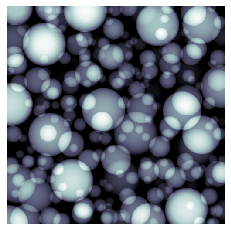

In [135]:
fig, ax = plt.subplots()
ax.imshow(ps.visualization.xray(~im[..., :100], axis=2), interpolation='none', origin='lower', cmap=plt.cm.bone)
ax.axis(False);

In [140]:
im.shape

(500, 500, 500)

In [139]:
np.save('rand_sphere_pack',im)

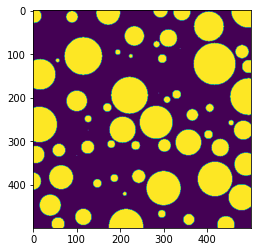

In [136]:
plt.imshow(im[len(im)//2])